In [63]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("dataset_output/lsa64_openpose/lsa64_dataset_cat_1.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_21_z,pose_22_x,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,5895,1,001_010_005.mp4,113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5896,5896,1,001_010_005.mp4,114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,5897,1,001_010_005.mp4,115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5898,5898,1,001_010_005.mp4,116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
frame = df.iloc[0]

In [10]:
frame

Unnamed: 0                  0
category                    1
video_name    001_001_001.mp4
frame                       0
hand_0_0_x           0.559302
                   ...       
pose_23_y                 0.0
pose_23_z                 0.0
pose_24_x                 0.0
pose_24_y                 0.0
pose_24_z                 0.0
Name: 0, Length: 415, dtype: object

In [11]:
landmarks_name = np.array([i for i in list(df.columns) if i not in ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "category", "category_index", "video_name", "frame", "missing_hand", "missing_face"]])

In [14]:
landmarks_name = landmarks_name.reshape((int(landmarks_name.shape[0]/3), 3))

In [13]:
video_size = (720, 1280)

In [164]:
df_test = pd.DataFrame(columns=df.columns)

In [167]:
for index, value in df.iterrows():
    value["frame"] = -1
    df_test = df_test.append(value, ignore_index=True)
    print(value)
    
    break

Unnamed: 0                  0
category                    1
video_name    001_001_001.mp4
frame                      -1
hand_0_0_x           0.559302
                   ...       
pose_23_y                 0.0
pose_23_z                 0.0
pose_24_x                 0.0
pose_24_y                 0.0
pose_24_z                 0.0
Name: 0, Length: 415, dtype: object


In [168]:
df_test

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_21_z,pose_22_x,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z
0,0,1,001_001_001.mp4,-1,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,001_001_001.mp4,-1,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df.iloc[0]

Unnamed: 0                  0
category                    1
video_name    001_001_001.mp4
frame                       0
hand_0_0_x           0.559302
                   ...       
pose_23_y                 0.0
pose_23_z                 0.0
pose_24_x                 0.0
pose_24_y                 0.0
pose_24_z                 0.0
Name: 0, Length: 415, dtype: object

Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim
Deu ruim


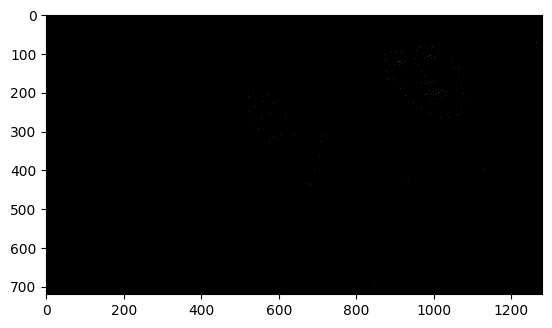

In [146]:
img = np.zeros(video_size, np.float32)
for lx, ly, lz in landmarks_name:
    if frame[lx] < 1 and frame[ly] < 1:
        rx, ry, rz = rotate_landmarks(frame[[lx, ly, lz]], math.radians(20))
        frame[[lx, ly, lz]] = rx, ry, rz
        rx, ry, rz = zoom_landmarks(frame[[lx, ly, lz]], 1.5)
        frame[[lx, ly, lz]] = rx, ry, rz
        rx, ry, rz = translate_landmarks(frame[[lx, ly, lz]], [0.2, -0.2, 0])
        x = int(rx * video_size[1])
        y = int(ry * video_size[0])
        if x < video_size[1] and y < video_size[0]:
            img[y, x] = 1
    else:
        print("Deu ruim")
plt.imshow(img * 255, cmap='gray')
# cv2.imshow(f"image_{video}", cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))

In [20]:
img

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
# GPT Code
def rotate_landmarks(landmarks, rotation_angle):
    # Assuming landmarks are in (x, y, z) format
    
    # Calculate the centroid (center) of the landmarks
#     centroid = np.mean(landmarks, axis=0)
    centroid = 0.5

    # Translate landmarks to the origin (center)
    translated_landmarks = landmarks - centroid
    # Create a rotation matrix for the given angle (in radians)
    rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle), 0],
                                 [np.sin(rotation_angle), np.cos(rotation_angle), 0],
                                 [0, 0, 1]])
    
    # Apply the rotation to each landmark
#     print(rotation_matrix)
    rotated_landmarks = np.dot(translated_landmarks, rotation_matrix)
    
    return rotated_landmarks + centroid

In [99]:
# GPT Code
def rotate_landmarks_x(landmarks, rotation_angle):
    # Assuming landmarks are in (x, y, z) format
    
    # Calculate the centroid (center) of the landmarks
#     centroid = np.mean(landmarks, axis=0)
    centroid = 0.5

    # Translate landmarks to the origin (center)
    translated_landmarks = landmarks - centroid
    # Create a rotation matrix for the given angle (in radians)
    rotation_matrix = np.array([np.cos(rotation_angle), -np.sin(rotation_angle)])
    
    # Apply the rotation to each landmark
#     print(rotation_matrix)
    rotated_landmarks = np.dot(translated_landmarks, rotation_matrix)
    
    return rotated_landmarks + centroid

In [88]:
def zoom_landmarks(landmarks, zoom_factor):
    # Scale the landmarks by the zoom factor
    zoomed_landmarks = landmarks * zoom_factor
    
    return zoomed_landmarks

In [89]:
def translate_landmarks(landmarks, translation_vector):
    # Translate the landmarks by the given vector
    translated_landmarks = landmarks + translation_vector
    
    return translated_landmarks

In [33]:
landmarks_name.flatten().shape

(411,)

In [44]:
landmarks_name[0]

array(['hand_0_0_x', 'hand_0_0_y', 'hand_0_0_z'], dtype='<U11')

In [172]:
df[landmarks_name[0]]

,hand_0_0_x,hand_0_0_y,hand_0_0_z
0,0.559302,0.943834,0.361916
1,0.557995,0.944853,0.363025
2,0.557992,0.945950,0.366478
3,0.557876,0.945462,0.389607
4,0.557848,0.945605,0.395565
...,...,...,...
5895,0.000000,0.000000,0.000000
5896,0.000000,0.000000,0.000000
5897,0.000000,0.000000,0.000000
5898,0.000000,0.000000,0.000000


In [174]:
rotate_landmarks(df[landmarks_name[0]], math.radians(10)).shape

(5900, 3)

In [59]:
rotate_landmarks(np.array([1, 1, 1]), (1, 1, 1))

array([1.59157467, 0.07867705, 0.67874885])

In [100]:
rotate_landmarks_x(np.array([1, 1, 1]), math.radians(10))

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [136]:
def rotate_x(landmarks, angle_x):
    rotation_matrix_x = np.array([0, np.cos(angle_x), -np.sin(angle_x)])
#     rotated_landmarks = np.dot(landmarks, rotation_matrix_x)
    rotated_landmarks = landmarks * rotation_matrix_x[1] + landmarks * rotation_matrix_x[2]
    return rotated_landmarks

In [137]:
rotate_x(frame[landmarks_name[0]][0], math.radians(10))

0.4536833350416795

In [132]:
rotate_x(np.array([1, 1, 1, 1]), math.radians(10))

array([0.81115958, 0.81115958, 0.81115958, 0.81115958])

In [109]:
np.array([1, 1, 1, 1]).shape

(4,)